<h1>World Series Prediction</h1>
<h1 style="color:red;">THIS PROJECT IS NOT A BETTING ADVICE.</h1>
<p></p>
<div>
    <b>Who will win the World Series</b>?
    Let's find out.
</div>

<h2>Table of Contents</h2>
<ol>
    <li><a href="#1">Import the data into DataFrame</a></li>
    <li><a href="#2">Process the Data</a></li>
    <li><a href="#3">Training the Model</a></li>
    <li><a href="#4">Conclusion</a></li>
</ol>

<p>Let's first import essential packages.</p>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math

plt.style.use('fivethirtyeight')

<h2 id="1">1. Import the data into DataFrame</h2>
<p></p>
<div>
    <p>This data is from <a href="https://www.kaggle.com/open-source-sports/baseball-databank">Baseball Databank</a> from Kaggle.</p>
</div>


In [2]:
teams = pd.read_csv("../data/baseball/Teams.csv")
teams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.830,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.820,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.810,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.800,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.830,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN


<h2 id="2">2. Clean and Prepare the Data</h2>
<p>There has been many changes made since Major League Baseball was created.</p>
<div>
    <p>
        For <b>consistency in rules</b>, I chose to include <b>only live-ball era(1920~) records</b>.
    </p>
    <p>
        For <b>change in the number of teams and proficiency of pitching and batting</b>, I have changed <b>stats into percentiles</b> relative to <b>performance of other teams in the corresponding season</b>.
    </p>
</div>

In [3]:
from scipy.stats import percentileofscore as score

"""
    Only one World Series winner exists each year.
    Therefore, we can get plenty of data of those who did not win the WS and those who win.
"""

teams = teams[teams['yearID'] >= 1920]

features = [
    'W',        #Total Number of games won
    'L',        #Total number of games lost
    'R',        #Run
    'AB',       #At Bat
    'H',        #Hit
    '2B',       #Double
    '3B',       #Triple
    'HR',       #Homerun
    'BB',       #Base on Balls
    'SO',       #Strike out
    'SB',       #Stolen Bases
    'CS',       #Caught Stealing
    'HBP',      #Hit by a Pitch
    'SF',       #Sacrifice Fly
    'RA',       #Pitcher'sRun Average
    'ER',       #Earned Run
    'ERA',      #Earned Run Average
    'CG',       #Complete Game
    'SHO',      #Shutout
    'SV',       #Save
    'IPouts',   #
    'HA',       #Hittingh Average
    'HRA',      #Homeruns allowed
    'BBA',      #Base on balls allowed
    'SOA',      #Strike out allowed
    'E',        #Error
    'DP',       #Double Plays
    'FP',       #Fielding Percentage
    'BPF',      #Ball Park Factor 
    'PPF'       #Pitching Park Factor
]

feature_percentile_col = lambda feature : f"{feature} Percentile"
percentiles = {feature_percentile_col(feature) : [] for feature in features}
for row in teams.index:
    yearID = teams.loc[row, 'yearID']
    target_year_teams = teams[teams['yearID'] == yearID]
    for feature in features:
        percentiles[feature_percentile_col(feature)].append(
            round(
                score(target_year_teams[feature], teams.loc[row, feature]),
                3
            )
        )

for column, series in percentiles.items():
    teams[column] = series

features = list(percentiles.keys())
final_features = ['yearID', 'name', 'WSWin'] + features
df = teams[final_features].set_index("yearID") #making the year of searhcable index

/var/folders/67/9r4fydw50cgd28p70wdc2klh0000gn/T/ipykernel_12406/3587604831.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams[column] = series


In [4]:
df

,name,WSWin,W Percentile,L Percentile,R Percentile,AB Percentile,H Percentile,2B Percentile,3B Percentile,HR Percentile,...,IPouts Percentile,HA Percentile,HRA Percentile,BBA Percentile,SOA Percentile,E Percentile,DP Percentile,FP Percentile,BPF Percentile,PPF Percentile
yearID,,,,,,,,,,,,,,,,,,,,,
1920,Boston Red Sox,N,37.500,68.750,43.750,25.000,37.500,37.500,28.125,18.750,...,75.000,71.875,53.125,71.875,75.000,6.250,75.000,90.625,12.500,6.250
1920,Brooklyn Robins,N,81.250,25.000,56.250,93.750,68.750,25.000,100.000,31.250,...,100.000,18.750,9.375,18.750,100.000,56.250,25.000,43.750,90.625,81.250
1920,Boston Braves,N,21.875,81.250,6.250,43.750,25.000,12.500,68.750,25.000,...,53.125,50.000,53.125,50.000,6.250,87.500,53.125,43.750,6.250,18.750
1920,Chicago White Sox,N,93.750,12.500,81.250,81.250,84.375,81.250,93.750,68.750,...,53.125,56.250,68.750,43.750,43.750,31.250,100.000,43.750,43.750,50.000
1920,Chicago Cubs,N,46.875,59.375,31.250,6.250,18.750,50.000,18.750,50.000,...,62.500,43.750,43.750,25.000,87.500,50.000,18.750,43.750,59.375,68.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,Los Angeles Dodgers,N,83.333,20.000,40.000,3.333,13.333,30.000,31.667,83.333,...,56.667,16.667,18.333,10.000,93.333,3.333,26.667,100.000,63.333,40.000
2015,San Francisco Giants,N,63.333,40.000,61.667,70.000,86.667,71.667,75.000,15.000,...,50.000,23.333,31.667,30.000,33.333,13.333,50.000,91.667,45.000,23.333
2015,Arizona Diamondbacks,N,43.333,60.000,76.667,100.000,90.000,78.333,93.333,46.667,...,96.667,76.667,88.333,76.667,40.000,26.667,56.667,76.667,96.667,91.667


<p>Let's check if there is any missing data</p>

In [9]:
df.isnull().sum()

name                    0
WSWin                  28
W Percentile            0
R Percentile            0
AB Percentile           0
H Percentile            0
2B Percentile           0
3B Percentile           0
HR Percentile           0
BB Percentile           0
SO Percentile           0
SB Percentile           0
CS Percentile         200
HBP Percentile       1622
SF Percentile        1622
RA Percentile           0
ER Percentile           0
ERA Percentile          0
CG Percentile           0
SHO Percentile          0
SV Percentile           0
IPouts Percentile       0
HA Percentile           0
HRA Percentile          0
BBA Percentile          0
SOA Percentile          0
E Percentile            0
DP Percentile           0
FP Percentile           0
BPF Percentile          0
PPF Percentile          0
dtype: int64

Since WSWin is our target, we will drop rows where target data is missing.
However, we will drop columns among features if there are any missing data.

In [10]:
df.drop(
    df[pd.isnull(df['WSWin'])].index, #indeces for rows where WSWin is empty
    inplace = True
)

"""
    Since World Series was cancelled in 1994 season due to strike,
    It is better to completely drop these rows.
"""
features_to_remove = ['CS Percentile', 'HBP Percentile', 'SF Percentile']
df.drop(features_to_remove, axis = 1, inplace = True)

for feature in features_to_remove:
    features.remove(feature)
    
df.isnull().sum()

name                 0
WSWin                0
W Percentile         0
R Percentile         0
AB Percentile        0
H Percentile         0
2B Percentile        0
3B Percentile        0
HR Percentile        0
BB Percentile        0
SO Percentile        0
SB Percentile        0
RA Percentile        0
ER Percentile        0
ERA Percentile       0
CG Percentile        0
SHO Percentile       0
SV Percentile        0
IPouts Percentile    0
HA Percentile        0
HRA Percentile       0
BBA Percentile       0
SOA Percentile       0
E Percentile         0
DP Percentile        0
FP Percentile        0
BPF Percentile       0
PPF Percentile       0
dtype: int64

<p>Now, there is no missing data.</p>
<p>Lastly, let's change WSWin data into 1 and 0 for later modeling.</p>

In [16]:
df['WSWin'] = [1 if datum == 'Y' else 0 for datum in df['WSWin'].values]
df

,name,WSWin,W Percentile,L Percentile,R Percentile,AB Percentile,H Percentile,2B Percentile,3B Percentile,HR Percentile,...,IPouts Percentile,HA Percentile,HRA Percentile,BBA Percentile,SOA Percentile,E Percentile,DP Percentile,FP Percentile,BPF Percentile,PPF Percentile
yearID,,,,,,,,,,,,,,,,,,,,,
1920,Boston Red Sox,0,37.500,68.750,43.750,25.000,37.500,37.500,28.125,18.750,...,75.000,71.875,53.125,71.875,75.000,6.250,75.000,90.625,12.500,6.250
1920,Brooklyn Robins,0,81.250,25.000,56.250,93.750,68.750,25.000,100.000,31.250,...,100.000,18.750,9.375,18.750,100.000,56.250,25.000,43.750,90.625,81.250
1920,Boston Braves,0,21.875,81.250,6.250,43.750,25.000,12.500,68.750,25.000,...,53.125,50.000,53.125,50.000,6.250,87.500,53.125,43.750,6.250,18.750
1920,Chicago White Sox,0,93.750,12.500,81.250,81.250,84.375,81.250,93.750,68.750,...,53.125,56.250,68.750,43.750,43.750,31.250,100.000,43.750,43.750,50.000
1920,Chicago Cubs,0,46.875,59.375,31.250,6.250,18.750,50.000,18.750,50.000,...,62.500,43.750,43.750,25.000,87.500,50.000,18.750,43.750,59.375,68.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,Los Angeles Dodgers,0,83.333,20.000,40.000,3.333,13.333,30.000,31.667,83.333,...,56.667,16.667,18.333,10.000,93.333,3.333,26.667,100.000,63.333,40.000
2015,San Francisco Giants,0,63.333,40.000,61.667,70.000,86.667,71.667,75.000,15.000,...,50.000,23.333,31.667,30.000,33.333,13.333,50.000,91.667,45.000,23.333
2015,Arizona Diamondbacks,0,43.333,60.000,76.667,100.000,90.000,78.333,93.333,46.667,...,96.667,76.667,88.333,76.667,40.000,26.667,56.667,76.667,96.667,91.667


<h2 id="3">3. Explore the Data</h2>
<p></p>
<div>
    <p></p>
</div>

In [12]:
numerical_cols =[
    'W Percentile',
    'L Percentile',
    'R Percentile',
    'AB Percentile',
    'H Percentile',
    '2B Percentile',
    '3B Percentile',
    'HR Percentile',
    'BB Percentile',
    'SO Percentile',
    'SB Percentile',
    'RA Percentile',
    'ER Percentile',
    'ERA Percentile',
    'CG Percentile',
    'SHO Percentile',
    'SV Percentile',
    'IPouts Percentile',
    'HA Percentile',
    'HRA Percentile',
    'BBA Percentile',
    'SOA Percentile',
    'E Percentile',
    'DP Percentile',
    'FP Percentile',
    'BPF Percentile',
    'PPF Percentile'
]

target = "WSWin"

<h3>Range and Median</h3>

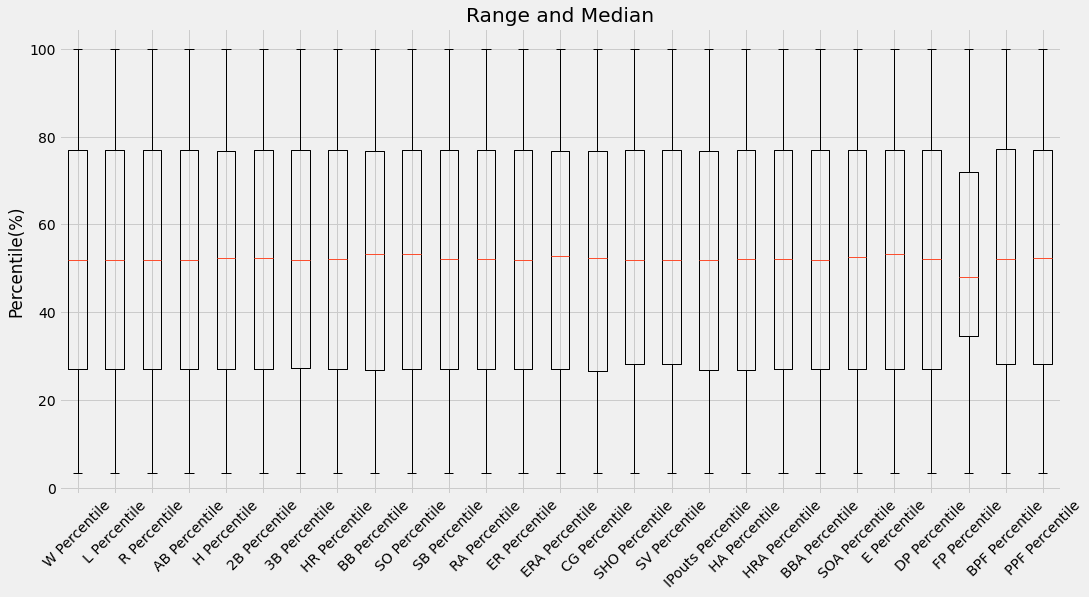

In [21]:
plt.figure(figsize = (16, 8))
plt.boxplot(df[numerical_cols])
plt.title("Range and Median")
plt.ylabel("Percentile(%)")
plt.xticks(
    ticks = np.arange(1, len(numerical_cols) + 1),
    labels = numerical_cols,
    rotation = 45
)
plt.show()

<div>
    <p>In the chart above, the red line in each box represents median.</p>
    <p>Top side of box represent max and bottom side of the box represents min.</p>
</div>

<h2 id="4">4. Training the Model</h2>
<p>Since it is a <b>classification problem</b>, I have trained and compare two models using <b>Logistic Regression</b> and <b>Decision Tree</b>.</p>

In [27]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
features = numerical_cols
target = "WSWin"

X, y = df[features], df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False) #it is time-series data.

<h3>Logistic Regression</h3>

In [28]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

<h3>Logistic Regression Evaluation</h3>
Let's evaluate the performance of Logistic Regression model using <b>Confusion Matrix</b>.

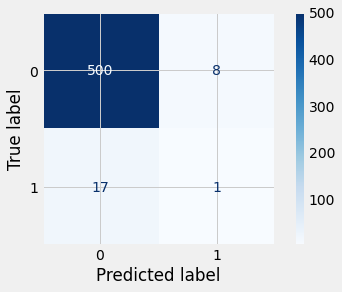

In [29]:
plot_confusion_matrix(
    model,                 #model
    X_test,                #X values
    y_test,                #y values
    cmap = plt.cm.Blues    #styling
)
plt.show()

<div>
    <ul>
        <li><b>0</b> means <b>Losing</b></li>
        <li><b>1</b> means <b>Winning</b></li>
    </ul>
    <p>
        On the X-axis, it represents actual datapoint result. On the Y-axis, it represents the predicted datapoint results.
    </p>
    <ul>
        <li>If <b>both True label and Predicted Label is 1</b>, it is <b>correct prediction</b> for winning.</li>
        <li>If <b>True label is 1 and Predicted Label is 0</b>, it is <b>incorrect prediction</b> for winning.</li>
        <li>If <b>True label is 0 and Predicted Label is 1</b>, it is <b>incorrect prediction</b> for losing.</li>
        <li>If <b>both True label and Predicted Label is 0</b>, it is <b>correct prediction</b> for losing.</li>
    </ul>
</div>

<div>
    <p>We are interested in correct predictions. We can compute our accuracy.</p>
</div>

In [30]:
y_preds = model.predict(X_test)

LR_accuracy = (accuracy_score(y_preds, y_test) * 100).round(2)
print(f"Accuracy of Logistic Regression is {LR_accuracy}%.")

Accuracy of Logistic Regression is 95.25%.


<h3>Decision Tree</h3>
<p>Let's first pre-prun the decision tree by finding optimal parameters because <b>decision tree tends to overfit</b>.</p>

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt = DecisionTreeClassifier()
parameter_grid =  {
    'max_depth': [5, 15, 25, 50],
    'min_samples_leaf': [i for i in range(1, int(math.sqrt(len(features))))],
    'max_leaf_nodes': [10, 20, 35, 50, 100]
}
gs = GridSearchCV(
    dt,                          
    parameter_grid,                #parameter grid(give options to try here)
    cv = 5                         #how many folds for k-fold method
)
gs.fit(X_train, y_train)           
best_params = gs.best_params_      #get the best parameters.
best_params

{'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 1}

<p>Now we have best parameters. We can build our optimized decision tree and evaluate its performance.</p>
<h3>Decision Tree Evaluation</h3>

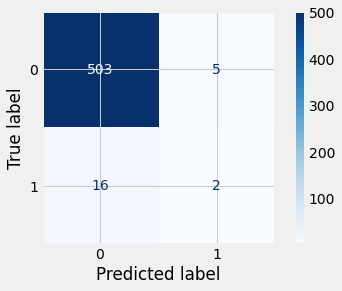

In [32]:
pre_pruned_tree_model = DecisionTreeClassifier(
    max_depth = best_params['max_depth'],   
    min_samples_leaf = best_params['min_samples_leaf'],
    max_leaf_nodes = best_params['max_leaf_nodes']
)
pre_pruned_tree_model.fit(X_train, y_train)

plot_confusion_matrix(
    pre_pruned_tree_model,                
    X_test,                #X values
    y_test,                #y values
    cmap = plt.cm.Blues    #styling
)
plt.show()

<div>
    <p>Please refer <a>here</a> to read confusion matrix.
        We are interested in correct predictions. We can compute our accuracy.</p>
</div>

In [33]:
y_preds = pre_pruned_tree_model.predict(X_test)

DT_accuracy = (accuracy_score(y_preds, y_test) * 100).round(2)
print(f"Accuracy of Decision Tree is {DT_accuracy }%.")

Accuracy of Decision Tree is 96.01%.


<p>For better understanding, let's visualize the decision tree we just built.</p>

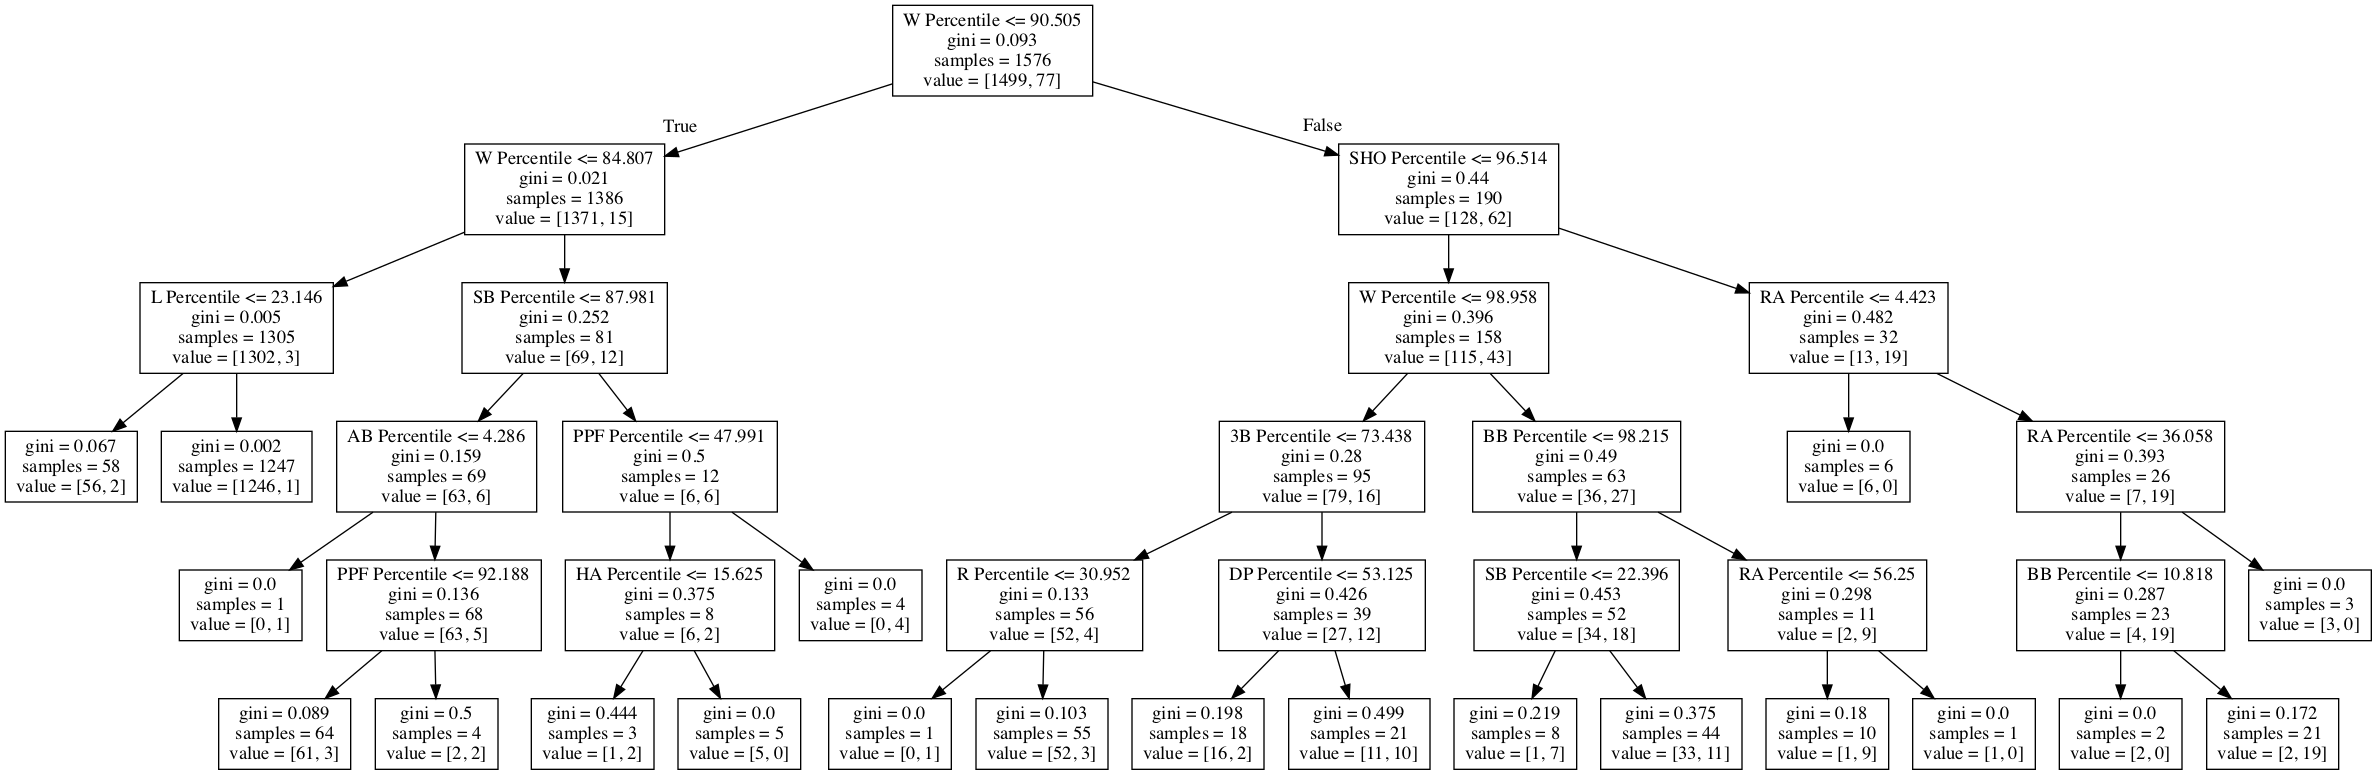

In [34]:
from IPython.display import Image
import graphviz 

dot_file = export_graphviz(pre_pruned_tree_model, feature_names = features)
graph = graphviz.Source(dot_file)
graph.render(
    filename = 'pre_pruned_tree',
    format = 'png',
    cleanup = True
)

Image(filename='pre_pruned_tree.png')

<h2 id="4">Interpretation</h2>
<p></p>
<div>
    <p></p>
</div>

<h3>Logistic Regression Model</h3>